<a href="https://colab.research.google.com/github/Room1097/ECG_Feature_Analysis_DAV_Project/blob/main/DAV_ML_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [248]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [250]:
file_path = '/content/drive/My Drive/a01.csv'
df = pd.read_csv(file_path)

X_raw = df.iloc[:, :-1] #signals
y = df.iloc[:, -1] #label

df.head()

,0,1,2,3,4,5,6,7,8,9,...,5991,5992,5993,5994,5995,5996,5997,5998,5999,labels
0,-0.060,-0.065,-0.060,-0.075,-0.065,-0.070,-0.070,-0.090,-0.080,-0.095,...,-0.105,-0.080,-0.07,-0.010,-0.03,0.015,0.04,0.070,0.090,0
1,0.140,0.170,0.215,0.245,0.250,0.240,0.240,0.255,0.230,0.180,...,-0.085,-0.080,-0.09,-0.095,-0.10,-0.085,-0.11,-0.095,-0.100,0
2,-0.100,-0.105,-0.105,-0.125,-0.110,-0.110,-0.100,-0.130,-0.110,-0.085,...,-0.060,-0.035,-0.03,-0.045,-0.05,-0.025,-0.04,-0.055,-0.110,0
3,-0.060,-0.085,-0.085,-0.085,-0.090,-0.145,-0.065,-0.130,-0.095,-0.170,...,0.000,0.010,0.00,-0.010,-0.04,-0.025,-0.01,0.030,0.020,0
4,0.025,0.030,0.100,0.115,0.095,0.165,0.185,0.085,0.065,0.015,...,-0.090,-0.080,-0.06,-0.030,0.00,0.030,0.05,0.070,0.115,0


In [251]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,5991,5992,5993,5994,5995,5996,5997,5998,5999,labels
484,-0.150,-0.165,-0.195,0.065,0.770,1.285,0.685,-0.300,-0.705,-0.525,...,-0.045,-0.030,-0.045,-0.035,-0.055,-0.050,-0.045,-0.045,-0.05,1
485,-0.045,-0.040,-0.055,-0.055,-0.060,-0.055,-0.055,-0.045,-0.070,-0.055,...,-0.060,-0.140,-0.210,-0.185,-0.200,-0.175,-0.225,0.020,0.87,1
486,1.740,1.130,-0.455,-0.710,-0.355,-0.135,-0.120,-0.115,-0.100,-0.100,...,-0.020,-0.035,-0.040,-0.045,-0.050,-0.030,-0.055,-0.055,-0.06,1
487,-0.040,-0.080,-0.060,-0.090,-0.060,-0.050,-0.065,-0.055,-0.080,-0.050,...,-0.050,-0.050,-0.055,-0.040,-0.070,-0.060,-0.060,-0.050,-0.05,1
488,-0.045,-0.045,-0.040,-0.045,-0.040,-0.045,-0.040,-0.045,-0.040,-0.045,...,-0.020,0.000,-0.025,-0.025,-0.040,-0.040,-0.050,-0.050,-0.04,1


In [252]:
df.shape

(489, 6001)

## plot initial data

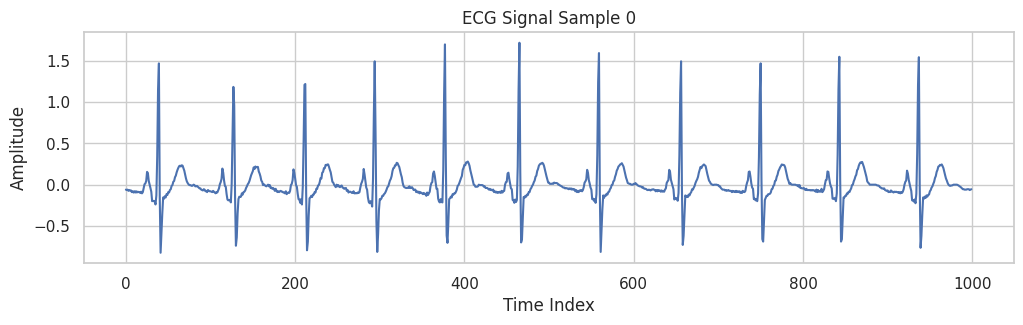

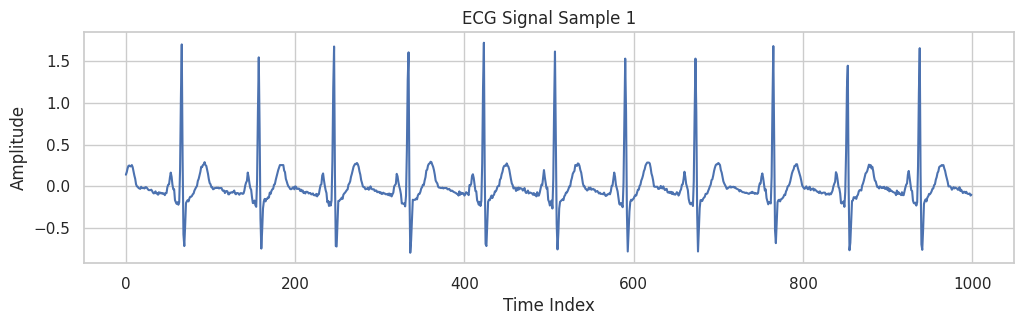

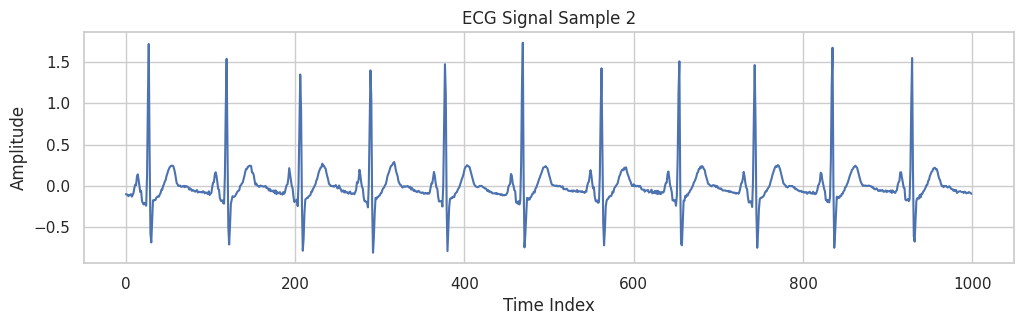

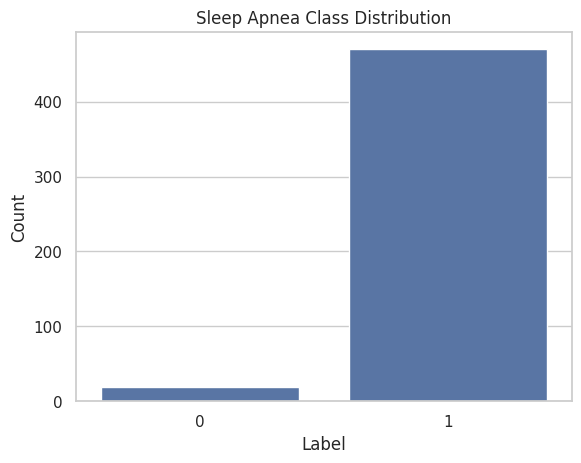

In [253]:
for i in range(3):
    plt.figure(figsize=(12, 3))
    plt.plot(X_raw.iloc[i].values[:1000])
    plt.title(f"ECG Signal Sample {i}")
    plt.xlabel("Time Index")
    plt.ylabel("Amplitude")
    plt.show()

sns.countplot(x=y)
plt.title("Sleep Apnea Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Feature Extraction

In [254]:
from scipy.signal import welch, find_peaks
from scipy.stats import skew, kurtosis, entropy
import numpy as np

In [255]:
def extract_features(signal):
    if np.isnan(signal).any():
        return {key: np.nan for key in feature_names}

    features = {}
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['var'] = np.var(signal)
    features['median'] = np.median(signal)
    features['min'] = np.min(signal)
    features['max'] = np.max(signal)
    features['range'] = np.ptp(signal)
    features['q1'] = np.percentile(signal, 25)
    features['q3'] = np.percentile(signal, 75)
    features['iqr'] = features['q3'] - features['q1']
    features['skewness'] = skew(signal)
    features['kurtosis'] = kurtosis(signal)
    features['rms'] = np.sqrt(np.mean(signal**2))
    features['zero_crossings'] = np.count_nonzero(np.diff(np.sign(signal)))
    abs_diff = np.abs(np.diff(signal))
    features['abs_diff_mean'] = np.mean(abs_diff)
    features['abs_diff_std'] = np.std(abs_diff)
    features['symmetry'] = np.mean(np.abs(signal - signal[::-1]))
    features['signal_energy'] = np.sum(signal**2)
    hist, _ = np.histogram(signal, bins=100, density=True)
    features['signal_entropy'] = entropy(hist + 1e-6)
    freqs, psd = welch(signal, fs=250)
    features['total_power'] = np.sum(psd)
    features['vlf_power'] = np.sum(psd[(freqs >= 0.003) & (freqs < 0.04)])
    features['lf_power'] = np.sum(psd[(freqs >= 0.04) & (freqs < 0.15)])
    features['hf_power'] = np.sum(psd[(freqs >= 0.15) & (freqs < 0.4)])
    features['lf_hf_ratio'] = features['lf_power'] / (features['hf_power'] + 1e-6)
    peaks, _ = find_peaks(signal, distance=50, height=np.mean(signal))
    rr = np.diff(peaks) if len(peaks) > 1 else [0]
    features['num_beats'] = len(peaks)
    features['mean_rr'] = np.mean(rr) if len(rr) > 0 else 0
    features['std_rr'] = np.std(rr) if len(rr) > 0 else 0
    features['min_rr'] = np.min(rr) if len(rr) > 0 else 0
    features['max_rr'] = np.max(rr) if len(rr) > 0 else 0
    features['heart_rate'] = (60 / (features['mean_rr'] / 250)) if features['mean_rr'] > 0 else 0
    return features

feature_names = [
    'mean','std','var','median','min','max','range','q1','q3','iqr','skewness','kurtosis',
    'rms','zero_crossings','abs_diff_mean','abs_diff_std','symmetry','signal_energy',
    'signal_entropy','total_power','vlf_power','lf_power','hf_power','lf_hf_ratio',
    'num_beats','mean_rr','std_rr','min_rr','max_rr','heart_rate'
]

X_features = pd.DataFrame([extract_features(row) for row in X_raw.values])
X_features = X_features.dropna() #clean dataset
y_cleaned = y[X_features.index] #clean labels


## comparison between initial and extracted features

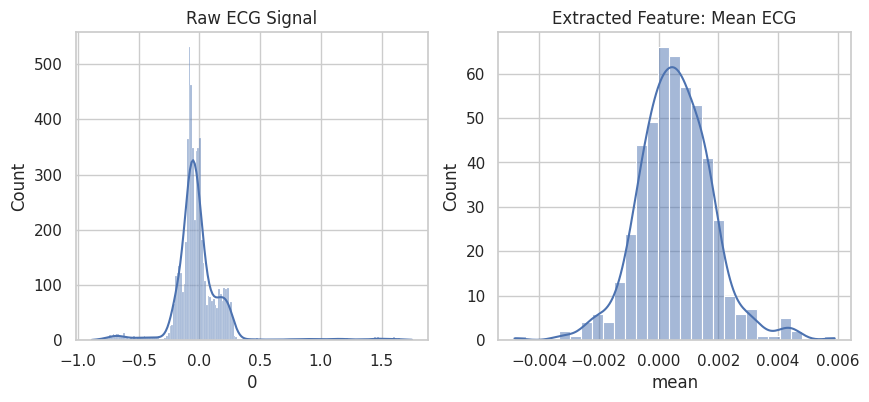

In [256]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(X_raw.iloc[0], kde=True)
plt.title("Raw ECG Signal")

plt.subplot(1, 2, 2)
sns.histplot(X_features['mean'], kde=True)
plt.title("Extracted Feature: Mean ECG")
plt.show()


# Transformation and Statistical Analysis

In [257]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

## scaling

In [258]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)


In [259]:
var_thresh = VarianceThreshold(threshold=0.0)
X_var_filtered = var_thresh.fit_transform(X_scaled)

non_constant_columns = X_features.columns[var_thresh.get_support()]


In [260]:
selector = SelectKBest(score_func=f_classif, k=20)
X_selected = selector.fit_transform(X_var_filtered, y_cleaned)
selected_features = non_constant_columns[selector.get_support()]

In [261]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_selected)


## hypothesis testing

In [283]:
from scipy.stats import f_oneway, ttest_ind, chi2_contingency, mannwhitneyu, pearsonr, wilcoxon
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LinearRegression
from sklearn.manifold import TSNE

In [286]:
def perform_hypothesis_tests(X_features: pd.DataFrame, y: pd.Series, top_n=5):
    df = X_features.copy()
    df['label'] = y.values
    results = []

    for col in X_features.columns[:top_n]:
        group0 = df[df['label'] == 0][col]
        group1 = df[df['label'] == 1][col]

        try:
            f_stat, f_p = f_oneway(group0, group1)
        except:
            f_stat, f_p = np.nan, np.nan

        try:
            binned = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
            df['binned'] = binned.fit_transform(df[[col]])
            contingency = pd.crosstab(df['binned'], df['label'])
            chi2_stat, chi2_p, _, _ = chi2_contingency(contingency)
        except:
            chi2_stat, chi2_p = np.nan, np.nan

        try:
            t_stat, t_p = ttest_ind(group0, group1, equal_var=False)
        except:
            t_stat, t_p = np.nan, np.nan

        try:
            u_stat, u_p = mannwhitneyu(group0, group1)
        except:
            u_stat, u_p = np.nan, np.nan

        try:
            min_len = min(len(group0), len(group1))
            w_stat, w_p = wilcoxon(group0.iloc[:min_len], group1.iloc[:min_len])
        except:
            w_stat, w_p = np.nan, np.nan

        try:
            r, r_p = pearsonr(df[col], df['label'])
        except:
            r, r_p = np.nan, np.nan

        try:
            model = LinearRegression()
            model.fit(df[[col]], df['label'])
            r_squared = model.score(df[[col]], df['label'])
        except:
            r_squared = np.nan

        results.append({
            'Feature': col,
            'ANOVA_F': f_stat, 'ANOVA_p': f_p,
            'Chi2': chi2_stat, 'Chi2_p': chi2_p,
            'T_Stat': t_stat, 'T_p': t_p,
            'U_Stat': u_stat, 'U_p': u_p,
            'Wilcoxon_Stat': w_stat, 'Wilcoxon_p': w_p,
            'Pearson_r': r, 'Pearson_p': r_p,
            'R_Squared': r_squared
        })

    # Compute t-SNE
    tsne_df = None
    try:
        tsne = TSNE(n_components=2, random_state=42)
        tsne_results = tsne.fit_transform(X_features)
        tsne_df = pd.DataFrame(tsne_results, columns=['TSNE_1', 'TSNE_2'])
        tsne_df['label'] = y.values
    except Exception as e:
        print(f"t-SNE failed: {e}")

    return pd.DataFrame(results), tsne_df


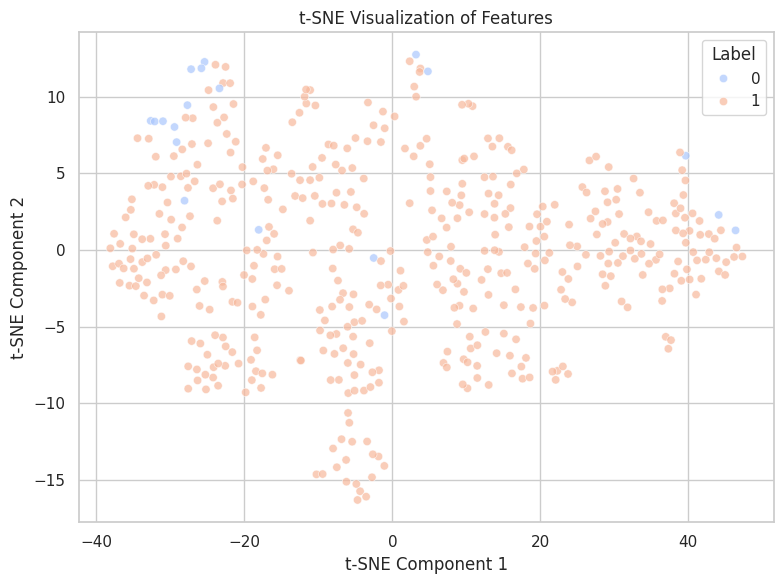

In [291]:
results_df, tsne_df = perform_hypothesis_tests(X_features, y, top_n=15)

if tsne_df is not None:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='TSNE_1', y='TSNE_2',
        hue='label',
        palette='coolwarm',
        data=tsne_df,
        alpha=0.7
    )
    plt.title("t-SNE Visualization of Features")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend(title='Label')
    plt.tight_layout()
    plt.show()


In [292]:
results_df

,Feature,ANOVA_F,ANOVA_p,Chi2,Chi2_p,T_Stat,T_p,U_Stat,U_p,Wilcoxon_Stat,Wilcoxon_p,Pearson_r,Pearson_p,R_Squared
0,mean,0.651099,4.201139e-01,7.019586,7.127613e-02,0.756384,0.458559,4604.0,8.185895e-01,62.0,0.195633,-0.036540,4.201139e-01,0.001335
1,std,59.212154,7.928981e-14,76.991149,1.356062e-16,5.730824,0.000017,7737.0,6.037555e-08,15.0,0.000523,-0.329249,7.928981e-14,0.108405
2,var,63.209802,1.305831e-14,88.388421,4.860363e-19,5.544049,0.000025,7737.0,6.037555e-08,15.0,0.000523,-0.338944,1.305831e-14,0.114883
3,median,13.746704,2.332358e-04,14.260433,2.571262e-03,-5.210708,0.000036,2274.5,1.299458e-04,15.0,0.666228,0.165688,2.332358e-04,0.027452
4,min,4.829134,2.845278e-02,0.568083,7.527355e-01,1.633048,0.119121,6123.0,6.034329e-03,60.0,0.434692,-0.099089,2.845278e-02,0.009819
5,max,43.655732,1.028749e-10,62.695058,1.560510e-13,-6.103620,0.000007,1176.5,5.154283e-08,2.0,0.000011,0.286823,1.028749e-10,0.082268
6,range,44.322693,7.526517e-11,25.480504,1.225071e-05,-6.356450,0.000004,1256.5,1.078740e-07,15.0,0.000523,0.288824,7.526517e-11,0.083420
7,q1,33.617076,1.207728e-08,54.020696,1.110714e-11,-4.574146,0.000210,1760.5,3.916056e-06,18.0,0.008926,0.254109,1.207728e-08,0.064572
8,q3,6.015094,1.453378e-02,26.411940,7.819113e-06,1.576997,0.131690,5417.5,1.122324e-01,71.5,0.812458,-0.110456,1.453378e-02,0.012201
9,iqr,16.294983,6.294566e-05,41.158283,6.052751e-09,2.527422,0.020772,6183.5,4.314166e-03,51.0,0.377455,-0.179935,6.294566e-05,0.032377


# Model Training and Evaluation

In [265]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       101

    accuracy                           1.00       188
   macro avg       1.00      1.00      1.00       188
weighted avg       1.00      1.00      1.00       188



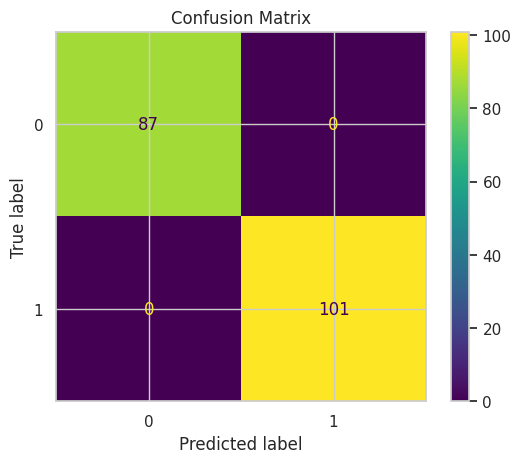

In [266]:
X_bal, y_bal = SMOTE().fit_resample(X_pca, y_cleaned)
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred)) #report

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

In [267]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]  # descending
top_n = 10

top_features = [selected_features[i] for i in indices[:top_n]]
top_scores = importances[indices[:top_n]]


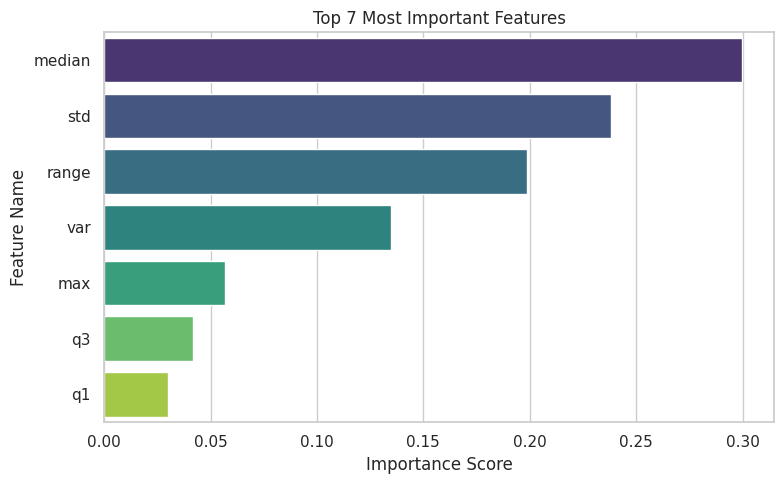

In [268]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_scores, y=top_features, hue=top_features, palette="viridis", legend=False)
plt.title("Top 7 Most Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()


### Neural Network Classifier (Binary Classification)
Using a simple feedforward neural network trained on the same PCA-reduced and SMOTE-balanced dataset.


In [269]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [270]:
X_nn = X_pca
y_nn = y_cleaned.values

X_bal_nn, y_bal_nn = SMOTE().fit_resample(X_nn, y_nn)

X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_bal_nn, y_bal_nn, test_size=0.2, random_state=42
)

In [271]:
model = Sequential([
    Input(shape=(X_train_nn.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [272]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [273]:
history = model.fit(X_train_nn, y_train_nn, epochs=100, batch_size=32,
                    validation_split=0.2, verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5322 - loss: 0.9869 - val_accuracy: 0.7550 - val_loss: 0.5199
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7553 - loss: 0.5125 - val_accuracy: 0.7616 - val_loss: 0.4214
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8059 - loss: 0.4175 - val_accuracy: 0.8609 - val_loss: 0.3532
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8381 - loss: 0.3532 - val_accuracy: 0.9007 - val_loss: 0.2951
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8789 - loss: 0.3058 - val_accuracy: 0.9139 - val_loss: 0.2519
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8765 - loss: 0.2969 - val_accuracy: 0.9139 - val_loss: 0.2163
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9235 - loss: 0.2128 - val_accuracy: 0.9272 - val_loss: 0.1902
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9457 - loss: 0.1912 - val_accuracy: 0.9338 - 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Neural Network Accuracy: 0.9946808510638298
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        87
           1       1.00      0.99      1.00       101

    accuracy                           0.99       188
   macro avg       0.99      1.00      0.99       188
weighted avg       0.99      0.99      0.99       188



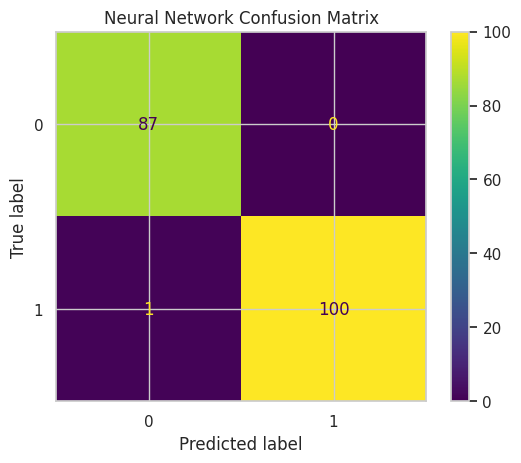

In [274]:
y_pred_nn = (model.predict(X_test_nn) > 0.5).astype("int32")

print("Neural Network Accuracy:", accuracy_score(y_test_nn, y_pred_nn))
print(classification_report(y_test_nn, y_pred_nn))

ConfusionMatrixDisplay.from_predictions(y_test_nn, y_pred_nn)
plt.title("Neural Network Confusion Matrix")
plt.show()


# SVM Classifier

We will be using 4 different Kernels to compare accuracy

In [275]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [276]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    print(f"\n----- Kernel: {kernel} -----")
    model = SVC(kernel=kernel, C=1.0, gamma='scale')

    model.fit(X_train, y_train)

    y_pred_svm = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred_svm)
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred_svm))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

    results[kernel] = acc


----- Kernel: linear -----
Accuracy: 0.9148936170212766
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        87
           1       0.92      0.92      0.92       101

    accuracy                           0.91       188
   macro avg       0.91      0.91      0.91       188
weighted avg       0.91      0.91      0.91       188

Confusion Matrix:
 [[79  8]
 [ 8 93]]

----- Kernel: poly -----
Accuracy: 0.8776595744680851
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85        87
           1       0.81      1.00      0.90       101

    accuracy                           0.88       188
   macro avg       0.91      0.87      0.87       188
weighted avg       0.90      0.88      0.87       188

Confusion Matrix:
 [[ 64  23]
 [  0 101]]

----- Kernel: rbf -----
Accuracy: 0.9840425531914894
Classification Report:
               precision    r

In [277]:
print("\n=== Accuracy Comparison ===")
for kernel, acc in results.items():
    print(f"{kernel}: {acc:.4f}")


=== Accuracy Comparison ===
linear: 0.9149
poly: 0.8777
rbf: 0.9840
sigmoid: 0.6596


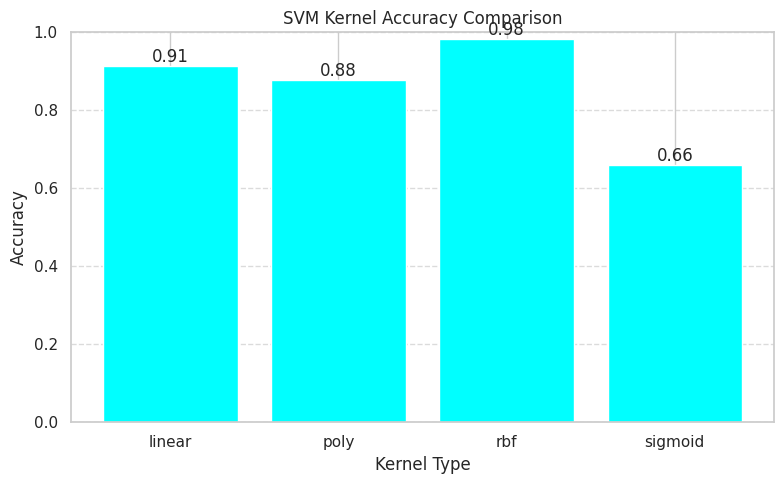

In [278]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='cyan')
plt.title("SVM Kernel Accuracy Comparison")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, (k, v) in enumerate(results.items()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.tight_layout()
plt.show()


# k-NN Classifier

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [280]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_features, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_knn, y_train_knn)

y_pred_knn = knn.predict(X_test_knn)

accuracy = accuracy_score(y_test_knn, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy:.2f}")


KNN Model Accuracy: 0.97


# Results and Comparison

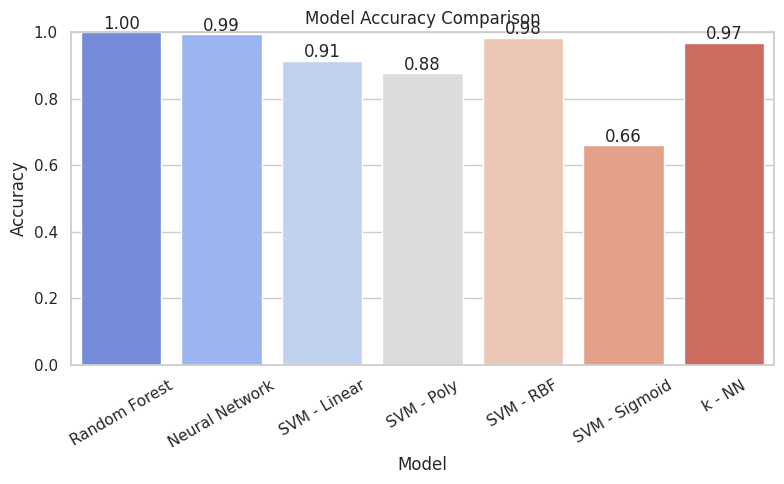

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

model_scores = [
    accuracy_score(y_test, y_pred),        # Random Forest
    accuracy_score(y_test_nn, y_pred_nn),  # Neural Network
    results['linear'],
    results['poly'],
    results['rbf'],
    results['sigmoid'],
    accuracy_score(y_test_knn, y_pred_knn),
]

results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Neural Network', 'SVM - Linear', 'SVM - Poly', 'SVM - RBF', 'SVM - Sigmoid', 'k - NN'],
    'Accuracy': model_scores
})


plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Model', palette='coolwarm', legend=False)
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
for i, row in results_df.iterrows():
    plt.text(i, row['Accuracy'] + 0.01, f"{row['Accuracy']:.2f}", ha='center')
plt.tight_layout()
plt.show()



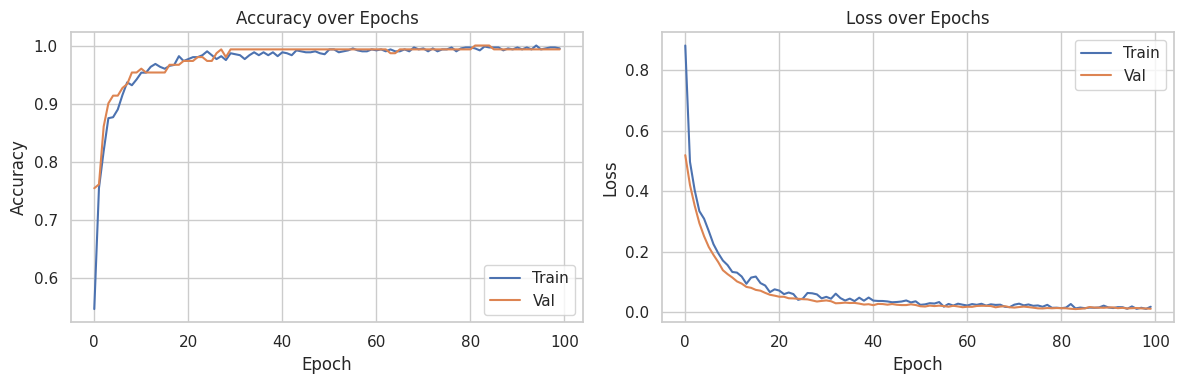

In [282]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
